In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import seaborn as sns

sns.set(style="darkgrid", palette="muted", color_codes=True) #

In [2]:
# irisデータのロード
iris = datasets.load_iris()

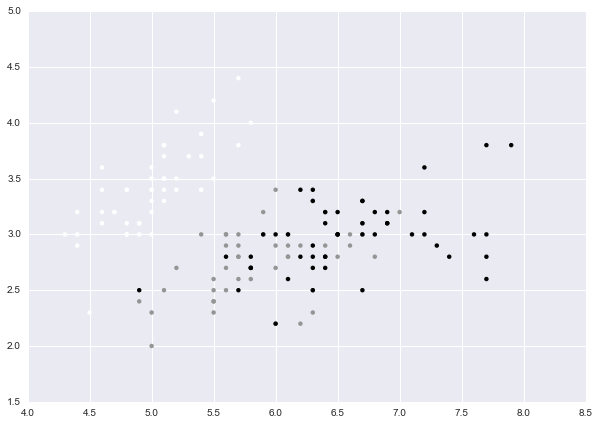

In [4]:
# 散布図の表示（色が白黒になってしまう・・・）
plt.figure(figsize=(10,7))
plt.scatter(iris.data[:,0], iris.data[:,1], c=iris.target, linewidths=0, alpha=1)
plt.show()

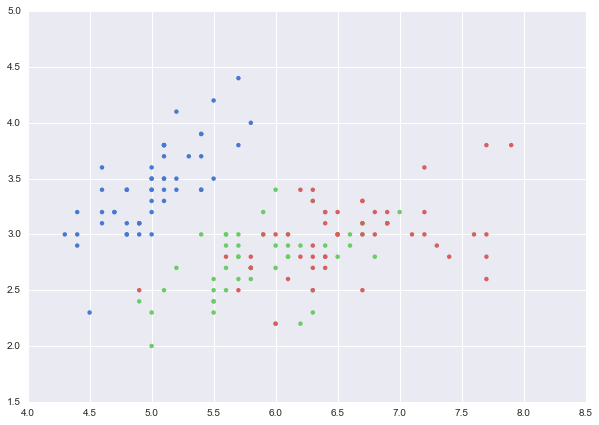

In [5]:
# 散布図の表示（ひとつずつ色を指定する palette: muted）
def set_color(l):
    if l == 0:
        return "b"
    elif l == 1:
        return "g"
    else:
        return "r"
    
color_list = map(set_color, iris.target)

plt.figure(figsize=(10,7))
plt.scatter(iris.data[:,0], iris.data[:,1], c=color_list, linewidths=0, alpha=1)
plt.show()

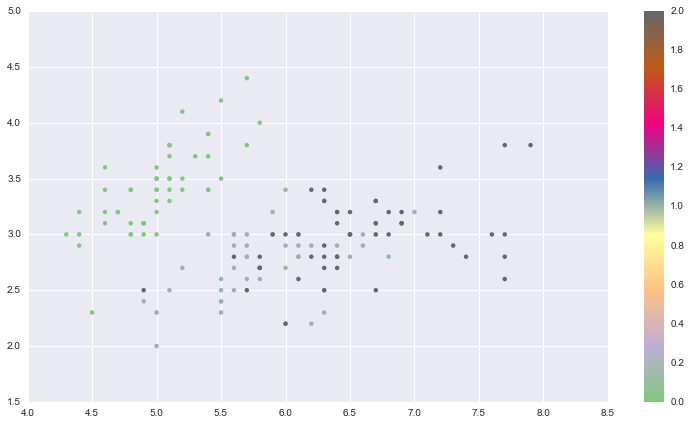

In [6]:
# 定義されているカラーマップを適用する
# 参考： http://matplotlib.org/examples/color/colormaps_reference.html

fig = plt.figure(figsize=(13,7))
im = plt.scatter(iris.data[:,0], iris.data[:,1], c=iris.target, linewidths=0, alpha=1, 
                 cmap=cm.Accent # ここでカラーマップを指定
                )
fig.colorbar(im)
plt.show()

## colormapをカスタマイズする

In [7]:
# colormapをカスタマイズする
from matplotlib.colors import LinearSegmentedColormap

In [8]:
def generate_cmap(colors):
    """自分で定義したカラーマップを返す"""
    values = range(len(colors))
    
    vmax = np.ceil(np.max(values))
    color_list = []
    for v, c in zip(values, colors):
        color_list.append( ( v/ vmax, c) )
    return LinearSegmentedColormap.from_list('custom_cmap', color_list)

set([0, 1, 2])


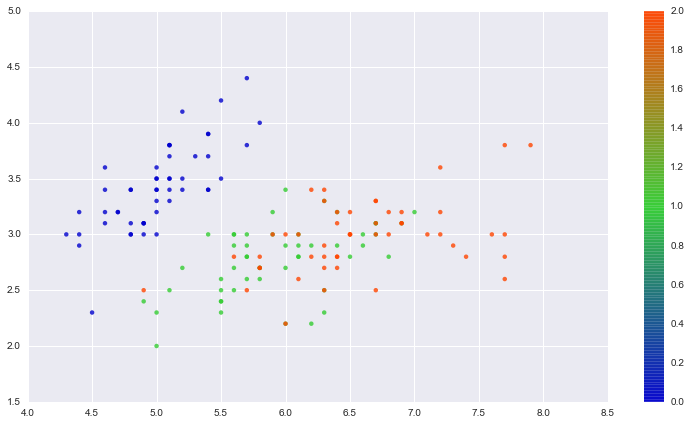

In [9]:
# 色をカスタマイズ, その1:色名称で指定
# 参考： http://matplotlib.org/examples/color/named_colors.html
unique_value = set(iris.target)
print unique_value
# --> [0, 1, 2]

cm = generate_cmap(['mediumblue', 'limegreen', 'orangered'])

fig = plt.figure(figsize=(13,7))
im = plt.scatter(iris.data[:,0], iris.data[:,1], c=iris.target, linewidths=0, alpha=.8, cmap=cm)
fig.colorbar(im)
plt.show()

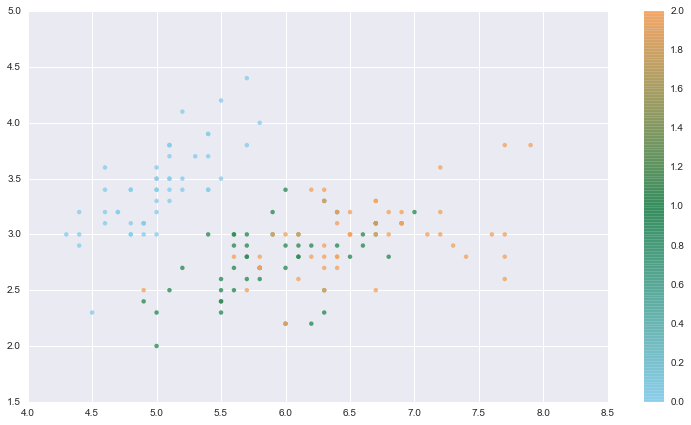

In [10]:
# 色をカスタマイズ, その2：16進で指定
# http://www5.plala.or.jp/vaio0630/hp/c_code.htm

cm = generate_cmap(['#87CEEB', '#2E8B57', '#F4A460'])

fig = plt.figure(figsize=(13,7))
im = plt.scatter(iris.data[:,0], iris.data[:,1], c=iris.target, linewidths=0, alpha=.8, cmap=cm)
fig.colorbar(im)
plt.show()

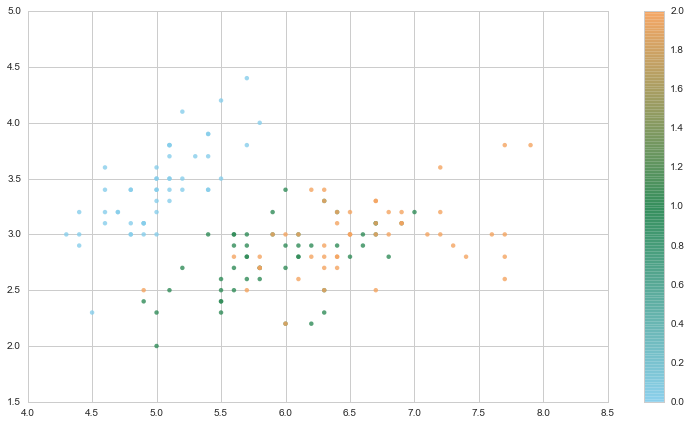

In [11]:
# 色をカスタマイズ, その3：背景を白くする
sns.set(style="whitegrid", palette="muted", color_codes=True)

cm = generate_cmap(['#87CEEB', '#2E8B57', '#F4A460'])

fig = plt.figure(figsize=(13,7))
im = plt.scatter(iris.data[:,0], iris.data[:,1], c=iris.target, linewidths=0, alpha=.8, cmap=cm)
fig.colorbar(im)
plt.show()

-1.99998781626 1.99999374286


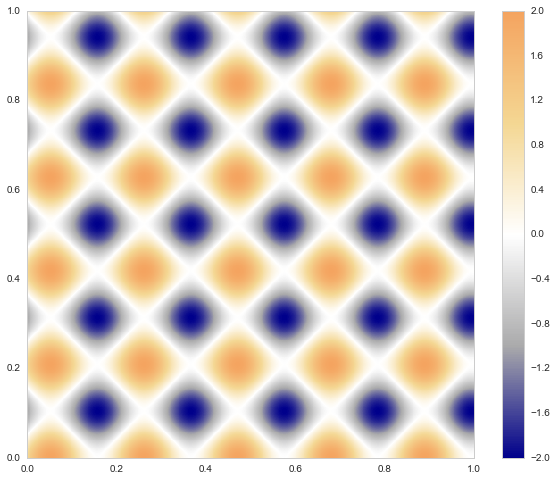

In [12]:
# 滑らかな塗りつぶし
n = 501
X, Y = np.meshgrid(np.linspace(0, 1, n), np.linspace(0, 1, n))
Z = np.sin(X*30) + np.cos(Y*30)
print np.min(Z), np.max(Z)

cm = generate_cmap(['#00008B', '#aaaaab', '#FFFFFF', '#F4D793', '#F4A460'])

fig =plt.figure(figsize=(10,8))
im = plt.pcolor(X, Y, Z, cmap=cm)

fig.colorbar(im)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

/Users/matsuken/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):


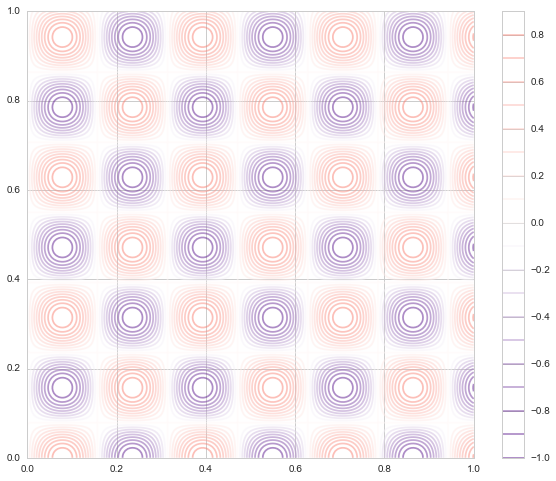

In [13]:
# 等高線
n = 201
X, Y = np.meshgrid(np.linspace(0, 1, n), np.linspace(0, 1, n))
Z = np.sin(X*20) * np.cos(Y*20)

cm = generate_cmap(['indigo', 'white', 'salmon'])

fig =plt.figure(figsize=(10,8))
interval = [i/10. -1 for i in range(20)]
im = plt.contour(X, Y, Z, interval, alpha=0.5, cmap=cm)

fig.colorbar(im)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

## 参考

Matplotlib colormaps reference<br>
　http://matplotlib.org/examples/color/colormaps_reference.html
 
Making a custom colormap using matplotlib in python (stackoverflow)<br>
　http://stackoverflow.com/questions/24997926/making-a-custom-colormap-using-matplotlib-in-python
 
名前が定義されている色一覧<br> 
　http://matplotlib.org/examples/color/named_colors.html

16進カラーコード<br>
　http://www5.plala.or.jp/vaio0630/hp/c_code.htm